In [1]:
# import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

601

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 2 of Set 1 | esperance
Processing Record 3 of Set 1 | yellowknife
Processing Record 4 of Set 1 | raudeberg
Processing Record 5 of Set 1 | mataura
Processing Record 6 of Set 1 | toliary
City not found. Skipping...
Processing Record 7 of Set 1 | magistralnyy
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | aguimes
Processing Record 10 of Set 1 | vaini
Processing Record 11 of Set 1 | kapaa
Processing Record 12 of Set 1 | ostrovnoy
Processing Record 13 of Set 1 | tocopilla
Processing Record 14 of Set 1 | alofi
Processing Record 15 of Set 1 | araci
Processing Record 16 of Set 1 | beira
Processing Record 17 of Set 1 | cherskiy
Processing Record 18 of Set 1 | toumodi
Processing Record 19 of Set 1 | lahaina
Processing Record 20 of Set 1 | hobart
Processing Record 21 of Set 1 | klaksvik
Processing Record 22 of Set 1 | jame

Processing Record 37 of Set 4 | guerrero negro
Processing Record 38 of Set 4 | puerto palomas
Processing Record 39 of Set 4 | zhigansk
Processing Record 40 of Set 4 | vallenar
Processing Record 41 of Set 4 | atar
Processing Record 42 of Set 4 | palabuhanratu
City not found. Skipping...
Processing Record 43 of Set 4 | awjilah
Processing Record 44 of Set 4 | rabat
Processing Record 45 of Set 4 | turukhansk
Processing Record 46 of Set 4 | antofagasta
Processing Record 47 of Set 4 | meyungs
City not found. Skipping...
Processing Record 48 of Set 4 | san pedro
Processing Record 49 of Set 4 | rawson
Processing Record 50 of Set 4 | lebu
Processing Record 1 of Set 5 | umm durman
City not found. Skipping...
Processing Record 2 of Set 5 | oistins
Processing Record 3 of Set 5 | shellbrook
Processing Record 4 of Set 5 | pleasanton
Processing Record 5 of Set 5 | bengkulu
Processing Record 6 of Set 5 | tasiilaq
Processing Record 7 of Set 5 | dauriya
Processing Record 8 of Set 5 | ponta do sol
Proces

Processing Record 28 of Set 8 | hay river
Processing Record 29 of Set 8 | oranjemund
Processing Record 30 of Set 8 | brtnice
Processing Record 31 of Set 8 | kysyl-syr
Processing Record 32 of Set 8 | moranbah
Processing Record 33 of Set 8 | niono
Processing Record 34 of Set 8 | norman wells
Processing Record 35 of Set 8 | porto nacional
Processing Record 36 of Set 8 | yanam
Processing Record 37 of Set 8 | airai
Processing Record 38 of Set 8 | boca do acre
Processing Record 39 of Set 8 | le port
Processing Record 40 of Set 8 | zhezkazgan
Processing Record 41 of Set 8 | dujuma
City not found. Skipping...
Processing Record 42 of Set 8 | los llanos de aridane
Processing Record 43 of Set 8 | pemba
Processing Record 44 of Set 8 | yining
Processing Record 45 of Set 8 | great falls
Processing Record 46 of Set 8 | mitsamiouli
Processing Record 47 of Set 8 | cachoeira do sul
Processing Record 48 of Set 8 | yumen
Processing Record 49 of Set 8 | porto seguro
Processing Record 50 of Set 8 | aksarka


Processing Record 17 of Set 12 | ulladulla
Processing Record 18 of Set 12 | oktyabrskoye
Processing Record 19 of Set 12 | santa maria
Processing Record 20 of Set 12 | ilulissat
Processing Record 21 of Set 12 | bozhou
Processing Record 22 of Set 12 | manggar
Processing Record 23 of Set 12 | pangnirtung
Processing Record 24 of Set 12 | lazurne
Processing Record 25 of Set 12 | eydhafushi
Processing Record 26 of Set 12 | aykhal
Processing Record 27 of Set 12 | vila franca do campo
Processing Record 28 of Set 12 | rundu
Processing Record 29 of Set 12 | buariki
City not found. Skipping...
Processing Record 30 of Set 12 | santa rosa
Processing Record 31 of Set 12 | kenora
Processing Record 32 of Set 12 | viedma
Processing Record 33 of Set 12 | flagstaff
Processing Record 34 of Set 12 | hot springs
Processing Record 35 of Set 12 | aasiaat
Processing Record 36 of Set 12 | hobyo
Processing Record 37 of Set 12 | novonikolsk
Processing Record 38 of Set 12 | roald
Processing Record 39 of Set 12 | d

In [10]:
len(city_data)

556

In [22]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Esperance,-33.87,121.90,60.80,100,75,13.87,AU,2020-10-15 03:20:45
1,Yellowknife,62.46,-114.35,24.80,58,75,20.80,CA,2020-10-15 03:19:21
2,Raudeberg,61.99,5.14,44.01,86,0,6.93,NO,2020-10-15 03:21:57
3,Mataura,-46.19,168.86,57.00,45,0,5.99,NZ,2020-10-15 03:21:58
4,Magistralnyy,56.17,107.45,38.05,74,93,8.72,RU,2020-10-15 03:21:58
5,Punta Arenas,-53.15,-70.92,46.40,61,75,12.75,CL,2020-10-15 03:21:58
6,Aguimes,27.91,-15.45,69.80,77,40,11.41,ES,2020-10-15 03:21:58
7,Vaini,-21.20,-175.20,77.00,69,75,8.05,TO,2020-10-15 03:21:58
8,Kapaa,22.08,-159.32,80.60,78,90,3.36,US,2020-10-15 03:21:59
9,Ostrovnoy,68.05,39.51,33.17,94,96,7.61,RU,2020-10-15 03:21:59


In [23]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [24]:
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Esperance,AU,2020-10-15 03:20:45,-33.87,121.90,60.80,100,75,13.87
1,Yellowknife,CA,2020-10-15 03:19:21,62.46,-114.35,24.80,58,75,20.80
2,Raudeberg,NO,2020-10-15 03:21:57,61.99,5.14,44.01,86,0,6.93
3,Mataura,NZ,2020-10-15 03:21:58,-46.19,168.86,57.00,45,0,5.99
4,Magistralnyy,RU,2020-10-15 03:21:58,56.17,107.45,38.05,74,93,8.72


In [25]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [26]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

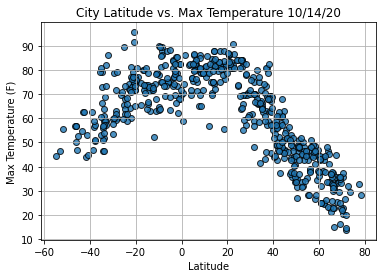

In [28]:
# Build the scatter plot for latitude vs. max temperature.
import time
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

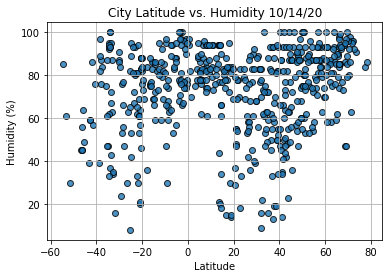

In [29]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

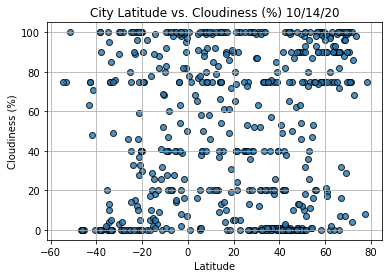

In [30]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

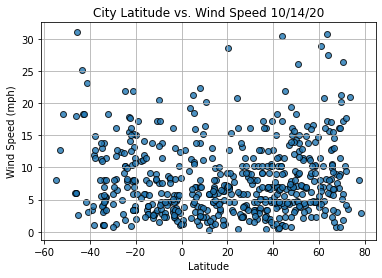

In [31]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [41]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [42]:
index13 = city_data_df.loc[13]
index13

City                        Beira
Country                        MZ
Date          2020-10-15 03:21:59
Lat                        -19.84
Lng                         34.84
Max Temp                     75.2
Humidity                       73
Cloudiness                     75
Wind Speed                  14.99
Name: 13, dtype: object

In [43]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

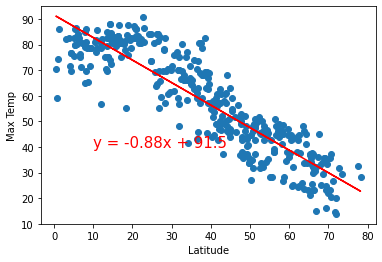

In [44]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

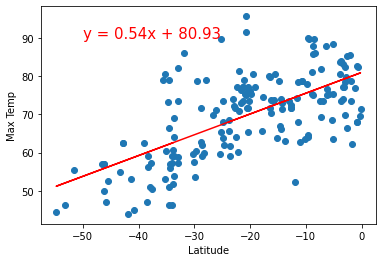

In [46]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

In [48]:
linregress(x_values, y_values)

LinregressResult(slope=0.5420370601532317, intercept=80.92775642525861, rvalue=0.6499197965066161, pvalue=4.214487360911654e-23, stderr=0.047375945778438)

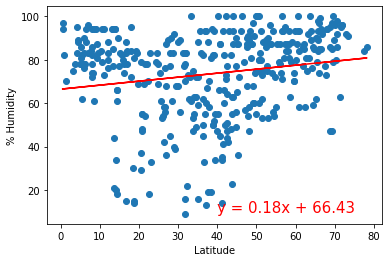

In [50]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

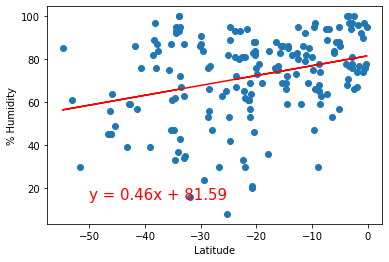

In [52]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

In [53]:
linregress(x_values, y_values)

LinregressResult(slope=0.4593390419890224, intercept=81.59490557863549, rvalue=0.3058624159500029, pvalue=2.8236511281186404e-05, stderr=0.10686911709024476)

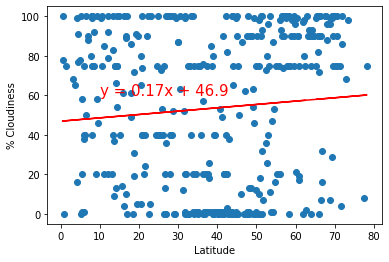

In [59]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(10,60))

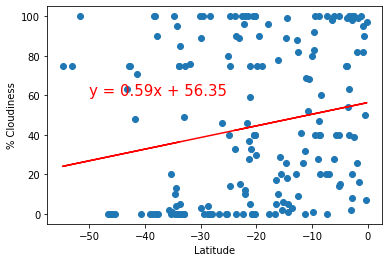

In [58]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

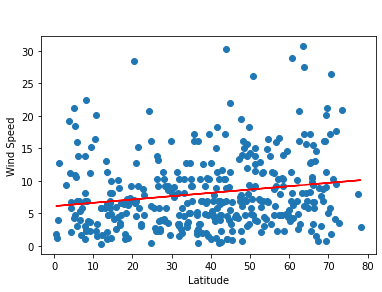

In [63]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

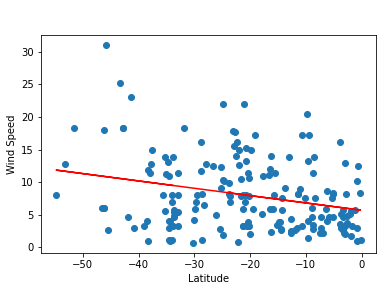

In [65]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))